In [1]:
import pandas as pd
import numpy as np

In [52]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Peek at the data

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Summary of the data

In [4]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Looking at the Data types

In [5]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Checking the missing values

In [6]:
train.apply(lambda x:sum(x.isnull()),axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Filling missing values with mean/mode

In [ ]:
train[''].fillna(mode(train['']).mode[0],inplace = True)
train[''].fillna(np.math.ceil(np.mean(train[''])),inplace = True)

## Basic Pivot table similar to Pivot table in Excel

In [7]:
pd.pivot_table(train,index=["Outlet_Size"],values=["Item_Outlet_Sales"],
                  columns=["Item_Fat_Content"],aggfunc=[np.mean])

mean                                         \
                 Item_Outlet_Sales                                          
Item_Fat_Content                LF      Low Fat      Regular      low fat   
Outlet_Size                                                                 
High                   2017.644481  2336.304175  2263.217991  2580.603811   
Medium                 2672.578269  2667.532112  2736.535212  2579.172124   
Small                  1786.570269  1891.962043  1969.864121  1460.788159   

                               
                               
Item_Fat_Content          reg  
Outlet_Size                    
High              1867.364138  
Medium            2098.126029  
Small             2175.291896

## Subsetting Data

### Subsetting by Names

In [34]:
train1 = train[['Item_Identifier','Item_Fat_Content','Item_Outlet_Sales']]

#(or)

remove_cols = ['Item_Fat_Content','Item_Outlet_Sales']
train.drop(remove_cols,axis=1,inplace=True)

### Subsetting by Indices

In [113]:
train1 = train[['Item_Identifier','Item_Fat_Content','Item_Outlet_Sales']]

In [114]:
train1.head()

,Item_Identifier,Item_Fat_Content,Item_Outlet_Sales
0,FDA15,Low Fat,3735.1380
1,DRC01,Regular,443.4228
2,FDN15,Low Fat,2097.2700
3,FDX07,Regular,732.3800
4,NCD19,Low Fat,994.7052


#### Selecting the required rows

In [115]:
train2 = train1.iloc[0:2,:]

In [116]:
train2

,Item_Identifier,Item_Fat_Content,Item_Outlet_Sales
0,FDA15,Low Fat,3735.1380
1,DRC01,Regular,443.4228


#### Select the first n rows

In [117]:
train2 = train1.iloc[:5,:]

In [118]:
train2

,Item_Identifier,Item_Fat_Content,Item_Outlet_Sales
0,FDA15,Low Fat,3735.1380
1,DRC01,Regular,443.4228
2,FDN15,Low Fat,2097.2700
3,FDX07,Regular,732.3800
4,NCD19,Low Fat,994.7052


#### Remove the first n rows

In [119]:
train2 = train1.iloc[5:,:]

In [120]:
train2

,Item_Identifier,Item_Fat_Content,Item_Outlet_Sales
5,FDP36,Regular,556.6088
6,FDO10,Regular,343.5528
7,FDP10,Low Fat,4022.7636
8,FDH17,Regular,1076.5986
9,FDU28,Regular,4710.5350
10,FDY07,Low Fat,1516.0266
11,FDA03,Regular,2187.1530
12,FDX32,Regular,1589.2646
13,FDS46,Regular,2145.2076
14,FDF32,Low Fat,1977.4260


#### Select the last n rows

In [121]:
train2 = train1.iloc[-5:,:]

In [122]:
train2

,Item_Identifier,Item_Fat_Content,Item_Outlet_Sales
8518,FDF22,Low Fat,2778.3834
8519,FDS36,Regular,549.2850
8520,NCJ29,Low Fat,1193.1136
8521,FDN46,Regular,1845.5976
8522,DRG01,Low Fat,765.6700


#### Remove the last n rows

In [123]:
train2 = train1.iloc[:-5,:]

In [124]:
train2

,Item_Identifier,Item_Fat_Content,Item_Outlet_Sales
0,FDA15,Low Fat,3735.1380
1,DRC01,Regular,443.4228
2,FDN15,Low Fat,2097.2700
3,FDX07,Regular,732.3800
4,NCD19,Low Fat,994.7052
5,FDP36,Regular,556.6088
6,FDO10,Regular,343.5528
7,FDP10,Low Fat,4022.7636
8,FDH17,Regular,1076.5986
9,FDU28,Regular,4710.5350


#### Selecting the required Cols

In [128]:
train1 = train[['Item_Identifier','Item_Fat_Content','Item_Outlet_Sales','Item_Visibility','Outlet_Location_Type']]
train1.head()

,Item_Identifier,Item_Fat_Content,Item_Outlet_Sales,Item_Visibility,Outlet_Location_Type
0,FDA15,Low Fat,3735.1380,0.016047,Tier 1
1,DRC01,Regular,443.4228,0.019278,Tier 3
2,FDN15,Low Fat,2097.2700,0.016760,Tier 1
3,FDX07,Regular,732.3800,0.000000,Tier 3
4,NCD19,Low Fat,994.7052,0.000000,Tier 3


In [129]:
train2 = train1.iloc[:,0:2]
train2.head()

,Item_Identifier,Item_Fat_Content
0,FDA15,Low Fat
1,DRC01,Regular
2,FDN15,Low Fat
3,FDX07,Regular
4,NCD19,Low Fat


#### Selecting the first n cols

In [130]:
train2 = train1.iloc[:,:3]
train2.head()

,Item_Identifier,Item_Fat_Content,Item_Outlet_Sales
0,FDA15,Low Fat,3735.1380
1,DRC01,Regular,443.4228
2,FDN15,Low Fat,2097.2700
3,FDX07,Regular,732.3800
4,NCD19,Low Fat,994.7052


#### Removing the first n cols

In [131]:
train2 = train1.iloc[:,3:]
train2.head()

,Item_Visibility,Outlet_Location_Type
0,0.016047,Tier 1
1,0.019278,Tier 3
2,0.016760,Tier 1
3,0.000000,Tier 3
4,0.000000,Tier 3


#### Selecting the last n cols

In [132]:
train2 = train1.iloc[:,-3:]
train2.head()

,Item_Outlet_Sales,Item_Visibility,Outlet_Location_Type
0,3735.1380,0.016047,Tier 1
1,443.4228,0.019278,Tier 3
2,2097.2700,0.016760,Tier 1
3,732.3800,0.000000,Tier 3
4,994.7052,0.000000,Tier 3


#### Removing the last n cols

In [133]:
train2 = train1.iloc[:,:-3]
train2.head()

,Item_Identifier,Item_Fat_Content
0,FDA15,Low Fat
1,DRC01,Regular
2,FDN15,Low Fat
3,FDX07,Regular
4,NCD19,Low Fat


## Splitting of Categorical and Continuous variables

In [8]:
cont_columns = []
cat_columns = []

for i in train.columns:
    if train[i].dtype == 'float':
        cont_columns.append(i)
    elif train[i].dtype == 'object':
        cat_columns.append(i)

In [9]:
print(cat_columns)
print(cont_columns)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']


## Removing Variables from a Data set

In [ ]:
ID = train['Item_Identifier']
#Drop unnecessary columns
train.drop('id',axis=1,inplace=True)

## Removing variables from a list

In [ ]:
cont_columns.pop(14)

## Log Transformation

In [10]:
train['Item_Outlet_Sales'] = np.log1p(train['Item_Outlet_Sales'])

# Visualizations

## Pair wise Visualizations with target variable

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\prashanth.s\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\prashanth.s\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


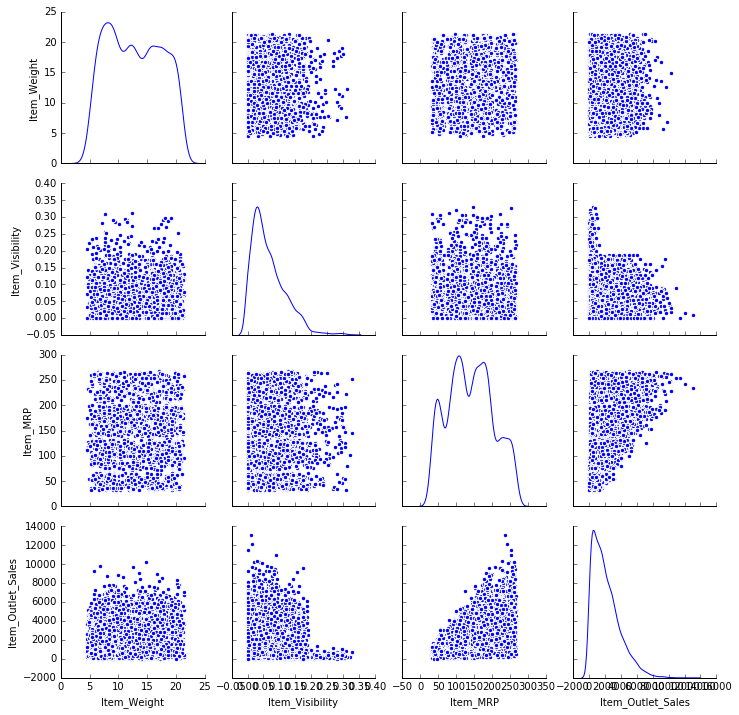

In [11]:
sns.pairplot(train[cont_columns], vars=['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales'], kind = 'scatter',diag_kind='kde')

## Simple Scatter Plot

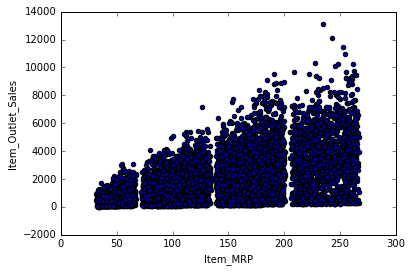

In [12]:
ax1 = train.plot.scatter(x='Item_MRP',
                        y='Item_Outlet_Sales',
                        c='DarkBlue')

## Histogram of Target variable

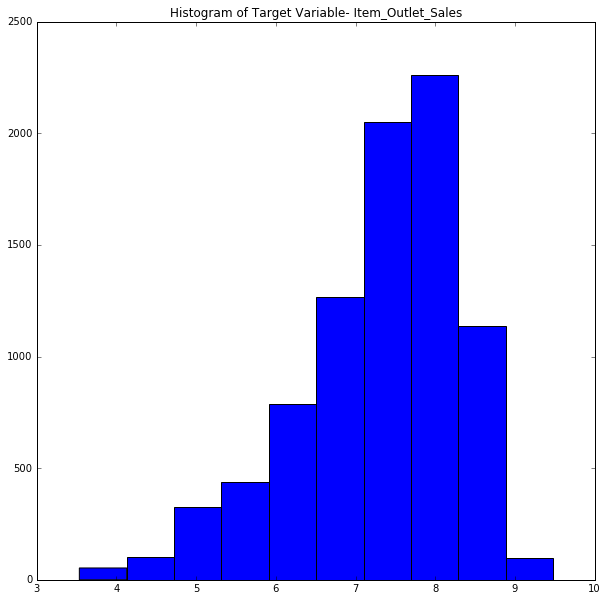

In [13]:
target = 'Item_Outlet_Sales'
plt.figure(figsize=(10,10))
plt.hist(np.log1p(train.Item_Outlet_Sales))
plt.title("Histogram of Target Variable- %s" %target)
plt.show()

## Correlation Matrix for continuous variables

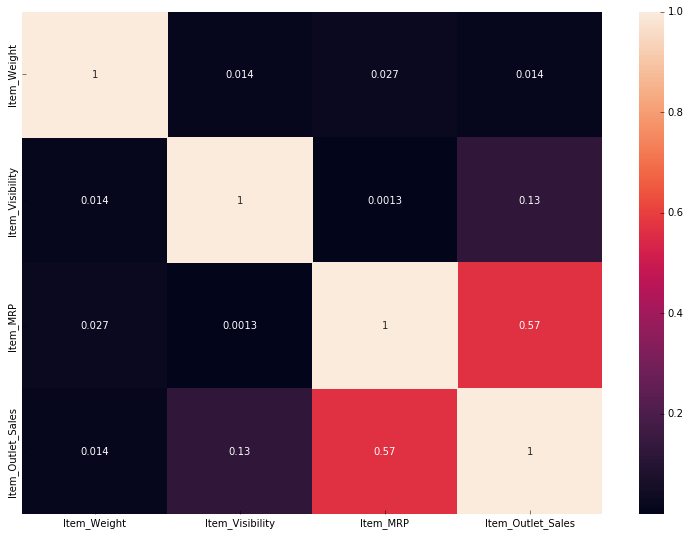

In [14]:
correlationMatrix = train[cont_columns].corr().abs()

plt.subplots(figsize=(13, 9))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()


## Continuous Variables Distrbution

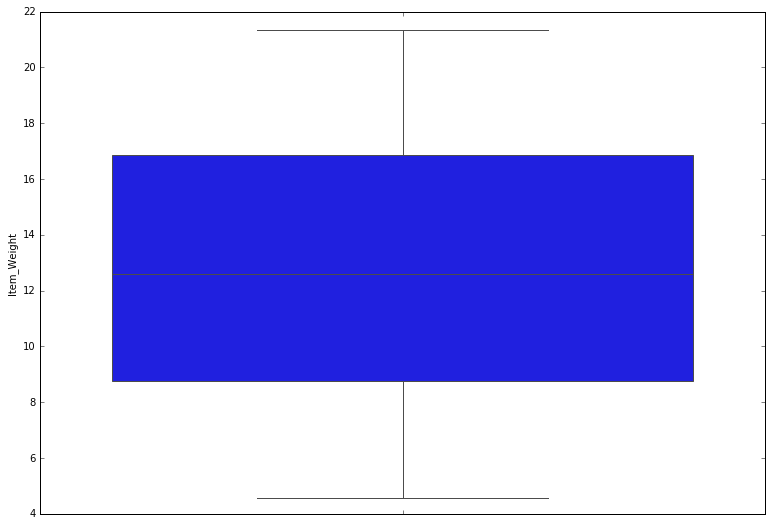

In [15]:
plt.figure(figsize=(13,9))
sns.boxplot(x="Item_Weight", data =train,orient='v')

## Skewness in Continuous variables

C:\Users\prashanth.s\AppData\Local\Continuum\Anaconda2\lib\site-packages\scipy\stats\stats.py:1031: RuntimeWarning: invalid value encountered in power
  lambda m2, m3: m3 / m2**1.5,


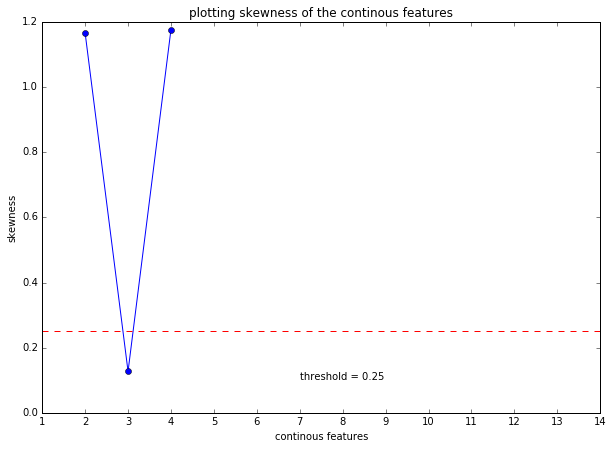

In [16]:
from scipy import stats

skewness_list = []
for cn in train[cont_columns].columns:
    skewness_list.append(stats.skew(train[cn]))

plt.figure(figsize=(10,7))
plt.plot(skewness_list, 'bo-')
plt.xlabel("continous features")
plt.ylabel("skewness")
plt.title("plotting skewness of the continous features")
plt.xticks(range(15), range(1,15,1))
plt.plot([(0.25) for i in range(0,14)], 'r--')
plt.text(6, .1, 'threshold = 0.25')
plt.show()


## Histogram of Skewed Columns

In [17]:
skewed_cont_columns = []
for i, cn in enumerate(cont_columns):
    if skewness_list[i] >= 0.25:
        skewed_cont_columns.append(cn)

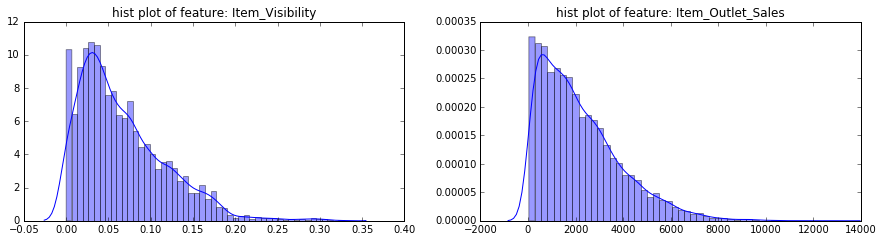

In [18]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(15,25))
gs = gridspec.GridSpec(6, 2)
for i, cn in enumerate(skewed_cont_columns):
    ax = plt.subplot(gs[i])
    sns.distplot(train[cn], bins=50)
    ax.set_xlabel('')
    ax.set_title('hist plot of feature: ' + str(cn))
plt.show()

## Frequency Plot of all Categorical Variables

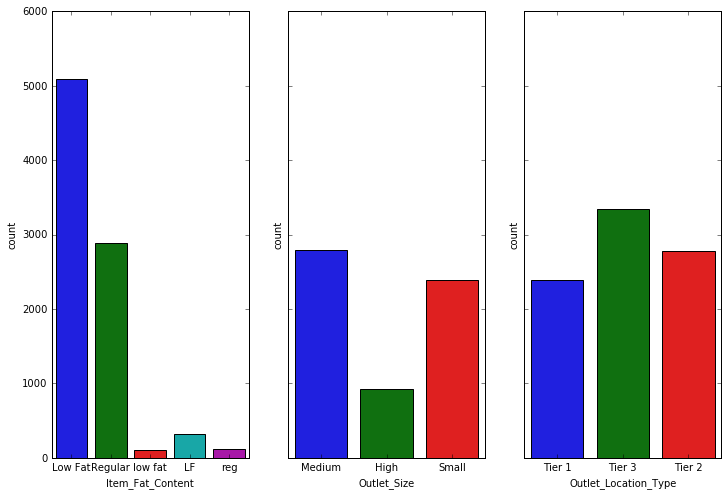

In [19]:
cols = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

#Plot count plot for all attributes in a 29x4 grid
n_cols = 3
n_rows = 1
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=train, ax=ax[j])

## Taking Count, CountUniq, Cumsum, Mean at certain levels

In [ ]:
## Count (Eg: Count of Oulet Size)
group_cols = ['Outlet_Size']
agg_name = 'Outlet_Size_Count'
gp = train[group_cols][group_cols].groupby(group_cols).size().rename(agg_name).to_frame().reset_index()
print(gp)
#train = train.merge(gp, on=group_cols, how='left')

## Count Unique (Eg: Unique count of Location Type at Outlet Size level)
group_cols = ['Outlet_Size']
counted = 'Outlet_Location_Type'
gp = train[group_cols+[counted]].groupby(group_cols)[counted].nunique().reset_index().rename(columns={counted:agg_name})
#print(gp)
train = train.merge(gp, on=group_cols, how='left')

## Cummulative Count (Eg: Cum count of Outlet Size at Item Fat Content Level level)
group_cols = ['Item_Fat_Content']
counted = 'Outlet_Size'
gp = train[group_cols+[counted]].groupby(group_cols)[counted].cumcount()
#print(gp)
train = train.merge(gp, on=group_cols, how='left')

## Mean (Eg: Mean of Sales at Item_Fat_Content Level)
group_cols = ['Item_Fat_Content']
counted = 'Item_Outlet_Sales'
agg_name = 'Item_Fat_Content_mean_Sales'
gp = train[group_cols+[counted]].groupby(group_cols)[counted].mean().reset_index().rename(columns={counted:agg_name})
#print(gp)
train = train.merge(gp, on=group_cols, how='left')

## Mean (Eg: Mean of Sales at Item_Fat_Content Level)
group_cols = ['Item_Fat_Content']
counted = 'Item_Outlet_Sales'
agg_name = 'Item_Fat_Content_variance_Sales'
gp = train[group_cols+[counted]].groupby(group_cols)[counted].var().reset_index().rename(columns={counted:agg_name})
#print(gp)
train = train.merge(gp, on=group_cols, how='left')

## Taking Lags

In [ ]:
train1 = train
train1['lag1'] = train1['Item_Outlet_Sales'].shift()

## Lag at a certain Level
train1['Lag_Fat_Content_Level'] = train1.groupby('Item_Fat_Content')['Item_Outlet_Sales'].shift(1)

In [ ]:
train1.head()

## Sorting of Data Frame

In [ ]:
train1 = train1.sort_index(by=['Item_Fat_Content', 'Item_Type'], ascending=[True, True])
train1.head()

In [53]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## One Hot Encoding of Categorical Features

In [50]:
train = pd.get_dummies(train, columns=['Item_Fat_Content','Outlet_Size'], drop_first=True)

## Label Encoding of Categorical Featurs

In [47]:
from sklearn.preprocessing import LabelEncoder

train1 = train
le = LabelEncoder().fit(train1['Item_Fat_Content'])
train1['Item_Fat_Content'] = le.transform(train1['Item_Fat_Content'])
print (train1.head())

## Reverse Tranform
train1['Item_Fat_Content']= (le.inverse_transform(train1['Item_Fat_Content']))
print (train1.head())

## Scaling and PCA

In [22]:
train1 = train

In [24]:
from sklearn import preprocessing 
le_sex = preprocessing.LabelEncoder()
for i in cat_columns:
    train1[i] = le_sex.fit_transform(train1[i])

In [ ]:
from sklearn.preprocessing import scale
X=train1.values

#Scaling the values
X = scale(X)

In [ ]:
pca = PCA(n_components=131)
pca.fit(X)

In [ ]:
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

## Train and Validation Split

In [29]:
from sklearn.cross_validation import train_test_split
X = train.loc[:, train.columns != 'Item_Outlet_Sales']
y = train['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

C:\Users\prashanth.s\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Modelling

### Linear Regression

In [ ]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error
# The mean Absolute error
print("Mean Absolute error: %.2f"
      % np.mean(abs(regr.predict(X_val) - Y_val)))

In [ ]:
# Plot outputs
plt.scatter(regr.predict(X_val), Y_val,color='black')

plt.xticks(())
plt.yticks(())

plt.show()

### Logistic Regression

In [ ]:
import statsmodels.api as sm

res = sm.Logit(y_train,X_train)

## Print the Summary
res.summary()

# fit the model
result = logit.fit()

### Random Forest

In [ ]:
## For Classification
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train,Y_train)

In [ ]:
## For Regression
from sklearn import tree
model = tree.DecisionTreeRegressor() 
model.fit(X_train,Y_train)

In [ ]:
#Predict Output
predicted= model.predict(X_val)

### XGBoost

In [ ]:
dtrain = xgb.DMatrix(X_train,y_train)
dvalid = xgb.DMatrix(X_val, y_val)

dtrain = xgb.DMatrix(train_x,train_y)
params = {
    "objective": "reg:linear",
    "booster": "gbtree",
    "max_depth":6,
    "eval_metric": "mae",
    "eta": 0.05,
    "silent": 1,
    'colsample':0.9,
    'subsample':0.9
}

In [ ]:
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

xgb = xgb.train(params, dtrain,500, evals=watchlist,
                early_stopping_rounds=10, verbose_eval=True)